# Data Analysis

### Import libraries

In [102]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from ipywidgets import interact, SelectionSlider

In [76]:
# Options
pd.set_option('display.max_columns', None)

### Read CSV

In [77]:
df = pd.read_csv("../preprocessing/01_pp_sg_train_cleaned.csv", sep=";")
df['datetime_formatted'] = pd.to_datetime(df['datetime'], format='%d.%m.%Y %H:%M')
df.head()

,P24,P44,P42,P33,P23,P25,P21,P31,P53,P32,P22,P52,P51,P43,datetime,ferien,feiertag,covid_19,olma_offa,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,datetime_formatted
0,90.0,62.0,0.0,42.0,8.0,138.0,93.0,13.0,0.0,19.0,9.0,0.0,4.0,51.0,01.10.2019 15:27,1,0,0,0,20.401,8.701,4.6,0.0,2019-10-01 15:27:00
1,87.0,70.0,0.0,44.0,13.0,139.0,90.0,15.0,0.0,19.0,8.0,0.0,5.0,51.0,01.10.2019 15:42,1,0,0,0,20.401,8.701,4.6,0.0,2019-10-01 15:42:00
2,78.0,70.0,0.0,38.0,10.0,142.0,109.0,18.0,0.0,23.0,12.0,0.0,9.0,51.0,01.10.2019 15:57,1,0,0,0,20.401,8.701,4.6,0.0,2019-10-01 15:57:00
3,84.0,90.0,0.0,39.0,7.0,146.0,117.0,17.0,0.0,26.0,16.0,0.0,14.0,51.0,01.10.2019 16:12,1,0,0,0,20.401,8.701,4.6,0.0,2019-10-01 16:12:00
4,88.0,111.0,0.0,45.0,10.0,153.0,127.0,30.0,0.0,31.0,13.0,0.0,19.0,51.0,01.10.2019 16:27,1,0,0,0,20.401,8.701,4.6,0.0,2019-10-01 16:27:00


### Some descriptive statistics 

In [78]:
df.describe()

,P24,P44,P42,P33,P23,P25,P21,P31,P53,P32,P22,P52,P51,P43,ferien,feiertag,covid_19,olma_offa,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,datetime_formatted
count,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.00000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987.000000,107987
mean,197.683582,218.914027,169.014983,75.746497,90.255688,229.753822,198.449110,91.310787,48.735014,57.989480,43.00088,81.065925,93.970246,16.403595,0.246215,0.030207,0.518414,0.032995,13.540469,5.712617,3.735794,0.324446,2021-07-02 11:50:49.550409216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.999000,-18.249000,0.000000,0.000000,2019-10-01 15:27:00
25%,152.000000,149.000000,110.000000,35.000000,45.000000,179.000000,134.000000,53.000000,0.000000,18.000000,19.00000,43.000000,36.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.451000,0.501000,0.000000,0.000000,2020-07-12 11:49:30
50%,229.000000,229.000000,188.000000,86.000000,117.000000,249.000000,243.000000,109.000000,61.000000,73.000000,45.00000,91.000000,128.000000,17.000000,0.000000,0.000000,1.000000,0.000000,13.701000,5.701000,0.600000,0.000000,2021-08-06 14:55:00
75%,252.000000,276.000000,236.000000,102.000000,128.000000,306.000000,260.000000,130.000000,92.000000,93.000000,67.00000,124.000000,143.000000,26.000000,0.000000,0.000000,1.000000,0.000000,19.701000,11.651000,4.900001,0.000000,2022-05-23 11:03:30
max,273.000000,500.000000,292.000000,175.000000,134.000000,367.000000,274.000000,138.000000,112.000000,96.000000,86.00000,155.000000,170.000000,51.000000,1.000000,1.000000,1.000000,1.000000,31.151000,20.451000,61.599995,23.939995,2023-02-28 23:56:00
std,67.068308,104.630261,75.723703,48.498134,46.266801,93.537388,75.444763,42.905542,42.382173,37.561499,26.56250,49.787953,54.951408,12.254692,0.430807,0.171158,0.499663,0.178624,7.429149,6.583483,6.671131,1.357947,NaN


### Define Dates

In [90]:
# Define Dates
date_from = pd.Timestamp(2022,3,1,0,0,0)
date_to = pd.Timestamp(2023,2,28,23,59,59)

In [94]:
# Filter Data
df = df[(df['datetime_formatted'] >= date_from) & (df['datetime_formatted'] <= date_to)]

### Resampling for overview

In [95]:
condition = lambda cols: cols.startswith('P')
colnames = [cols for cols in df.columns if condition(cols)]

for name in colnames:
    time_series = pd.Series(df[name].values, index=df['datetime_formatted'])

    # Funktion zum Plotten der Zeitreihe mit interaktivem Slider
    def plot_time_series(resample_freq):
        resampled_series = time_series.resample(resample_freq).mean()

        plt.figure(figsize=(20, 6))
        plt.plot(time_series.index, time_series.values, label='Original')
        plt.plot(resampled_series.index, resampled_series.values, label=f'Resampled ({resample_freq})', linestyle='-')

        plt.xlabel('Datum')
        plt.ylabel('Anzahl freie Parkplätze')
        plt.title(name + ' mit Resampling')
        plt.legend()
        plt.show()

    # Interaktiver Slider für die Auswahl der Resampling-Frequenz
    freq_slider = SelectionSlider(
        options=['D', 'W', 'M', 'Q', 'Y'],  # Optionen für die Frequenz
        value='M',  # Standardwert
        description='Frequenz:'
    )

    # Verwenden Sie interact mit dem Slider
    interact(plot_time_series, resample_freq=freq_slider)

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

interactive(children=(SelectionSlider(description='Frequenz:', index=2, options=('D', 'W', 'M', 'Q', 'Y'), val…

### Autocorrelation
Autocorrelation is the similarity between observations as a function of the time lag between them. Vgl. https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

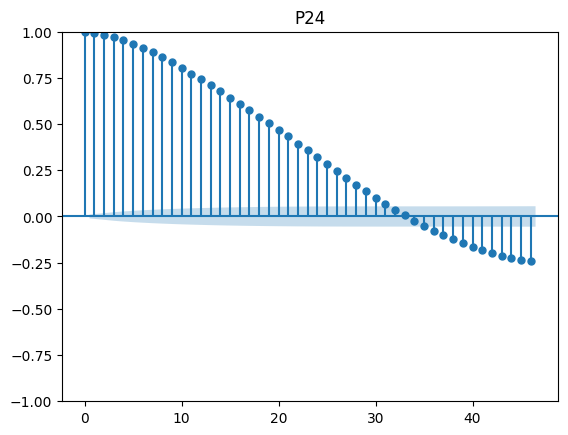

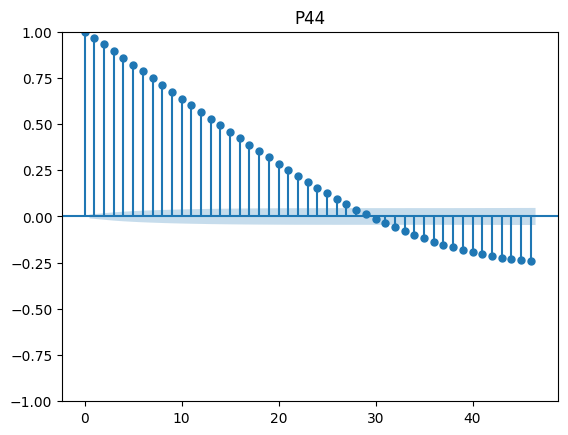

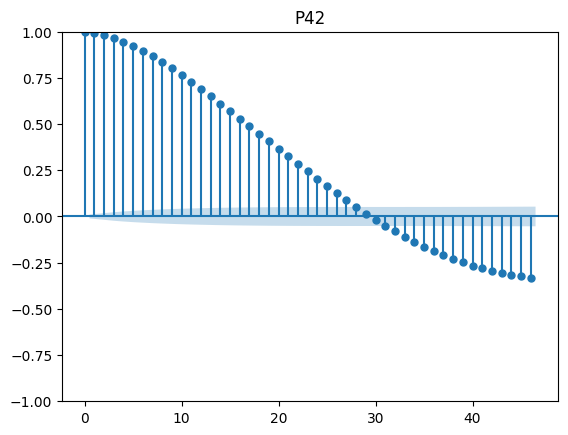

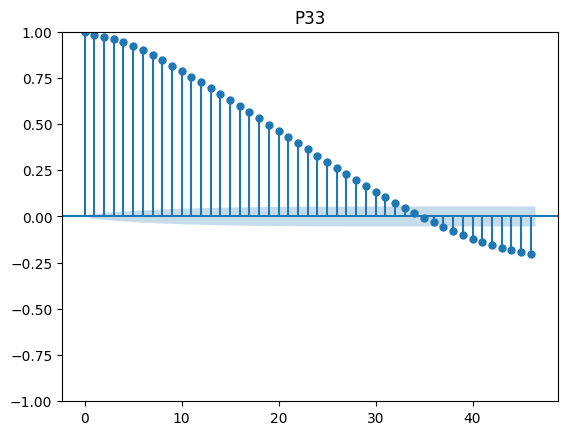

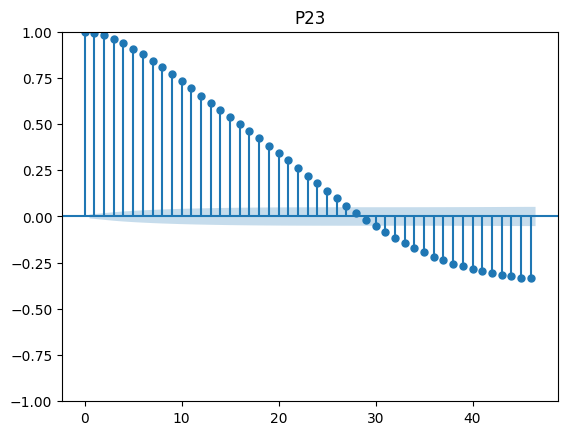

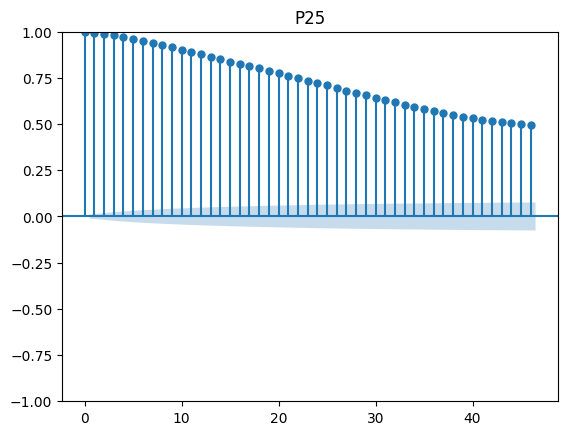

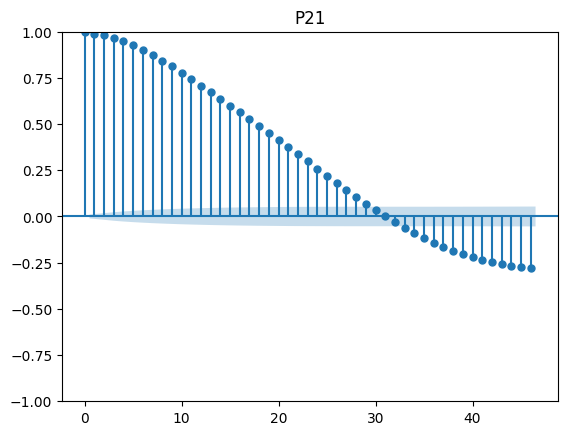

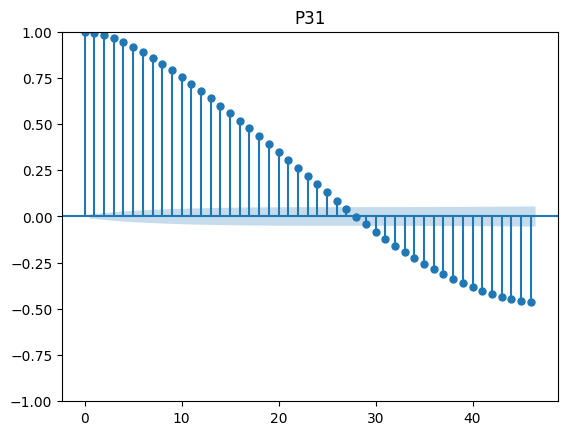

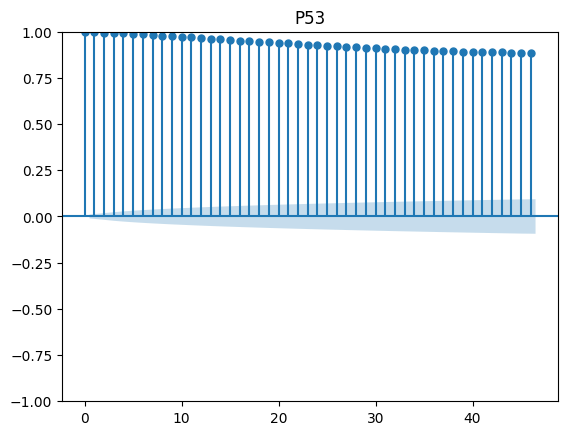

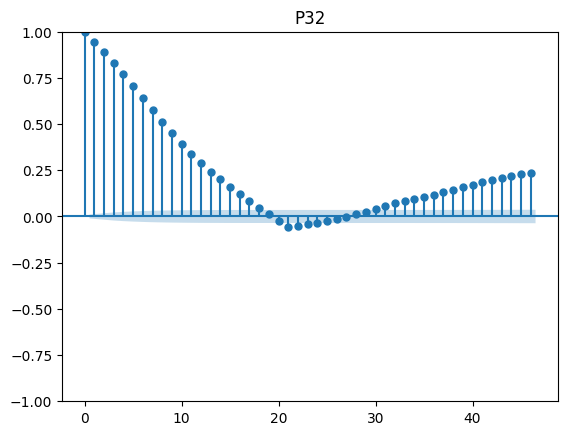

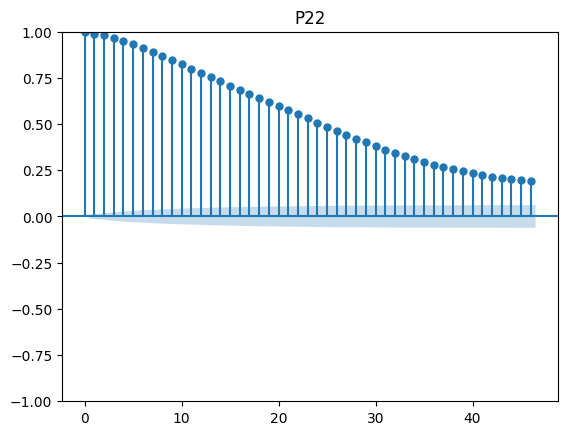

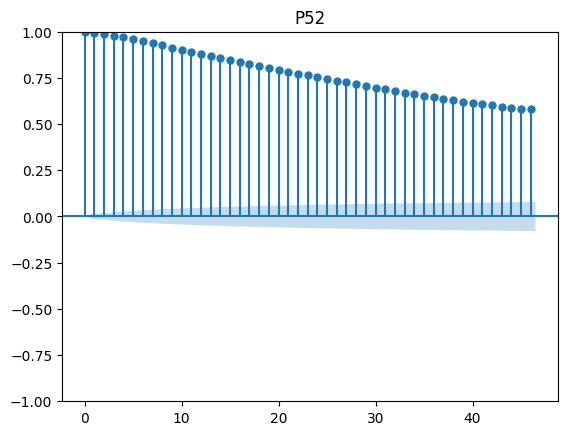

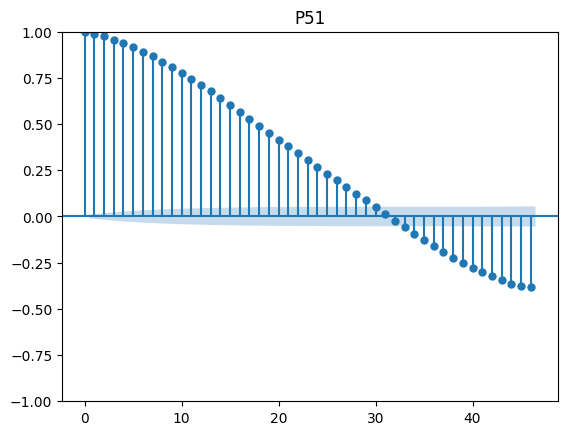

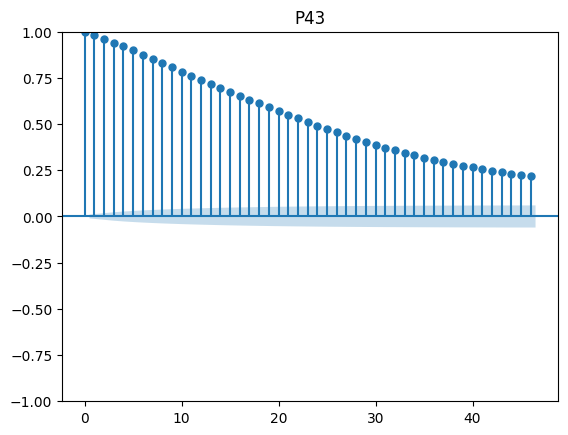

In [101]:
for name in colnames:
    time_series = pd.Series(df[name].values, index=df['datetime_formatted'])
    plot_acf(time_series, title = name)

### Seasonal Decomposing

In [ ]:
for name in colnames:
    time_series = pd.Series(df[name].values, index=df['datetime_formatted'])

    decompose_result_mult = seasonal_decompose(time_series, model="multiplicative")

    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid

    decompose_result_mult.plot();

In [121]:
time_series = pd.DataFrame(df['P24'].values, index=df['datetime_formatted'])
time_series.columns=['P24']
time_series.head()

,P24
datetime_formatted,
2022-03-01 00:12:00,253.0
2022-03-01 00:27:00,253.0
2022-03-01 00:42:00,253.0
2022-03-01 00:57:00,253.0
2022-03-01 01:12:00,253.0


In [124]:
time_series = pd.DataFrame(df['P24'].values, index=df['datetime_formatted'])
time_series.columns=['P24']
time_series['datetime_formatted'] = time_series['datetime_formatted'].dt.to_period('M')
time_series.index = time_series.index.to_timestamp(freq='M')

decompose_result_mult = seasonal_decompose(time_series, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

KeyError: 'datetime_formatted'

### Plot data

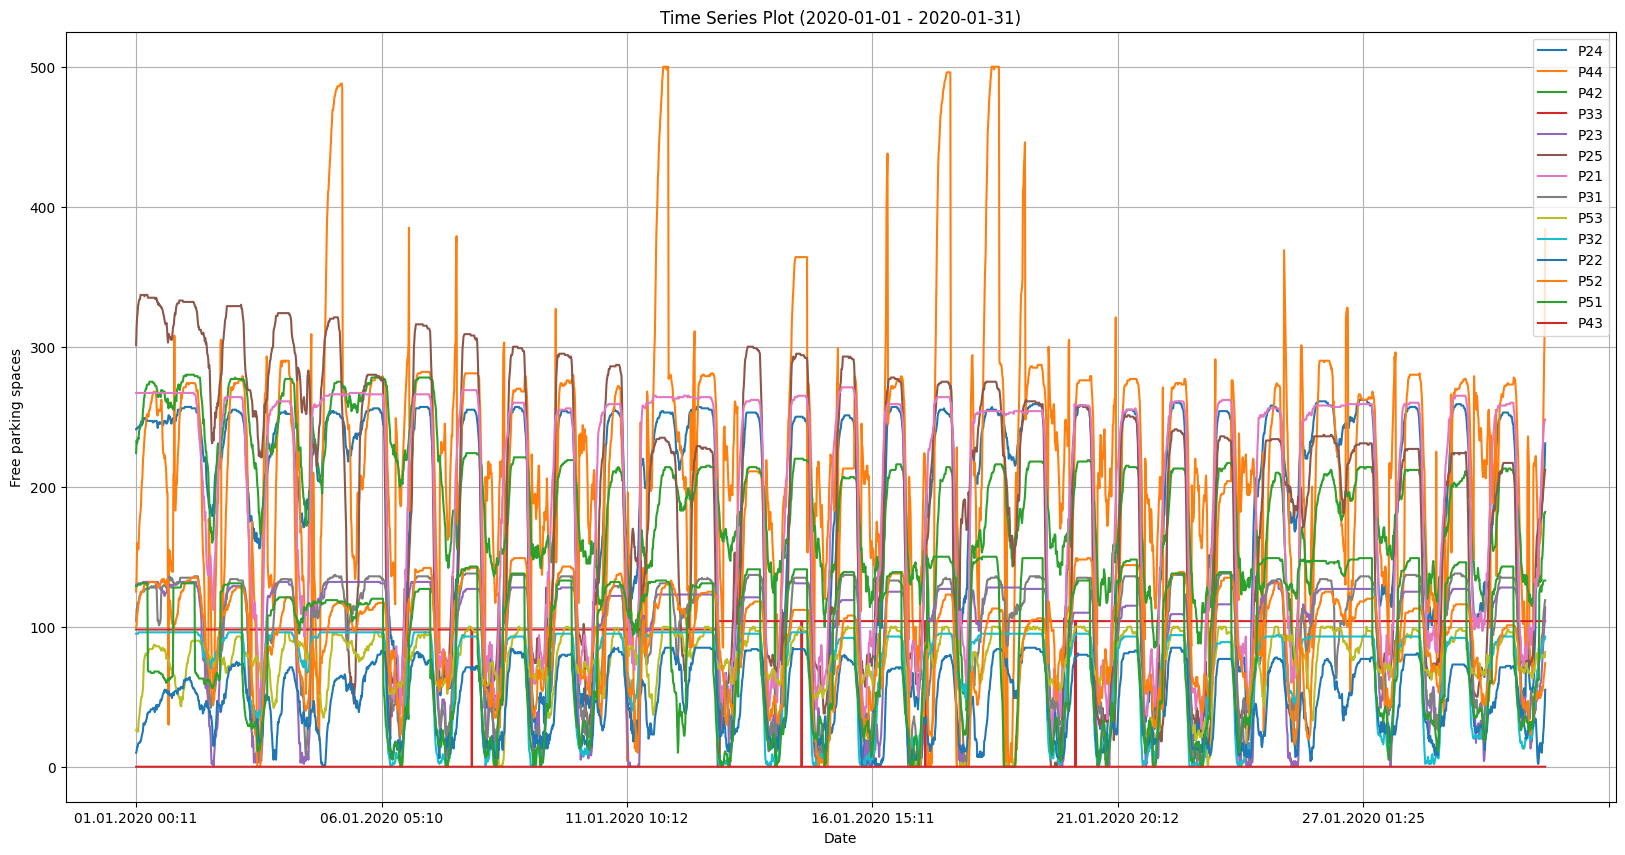

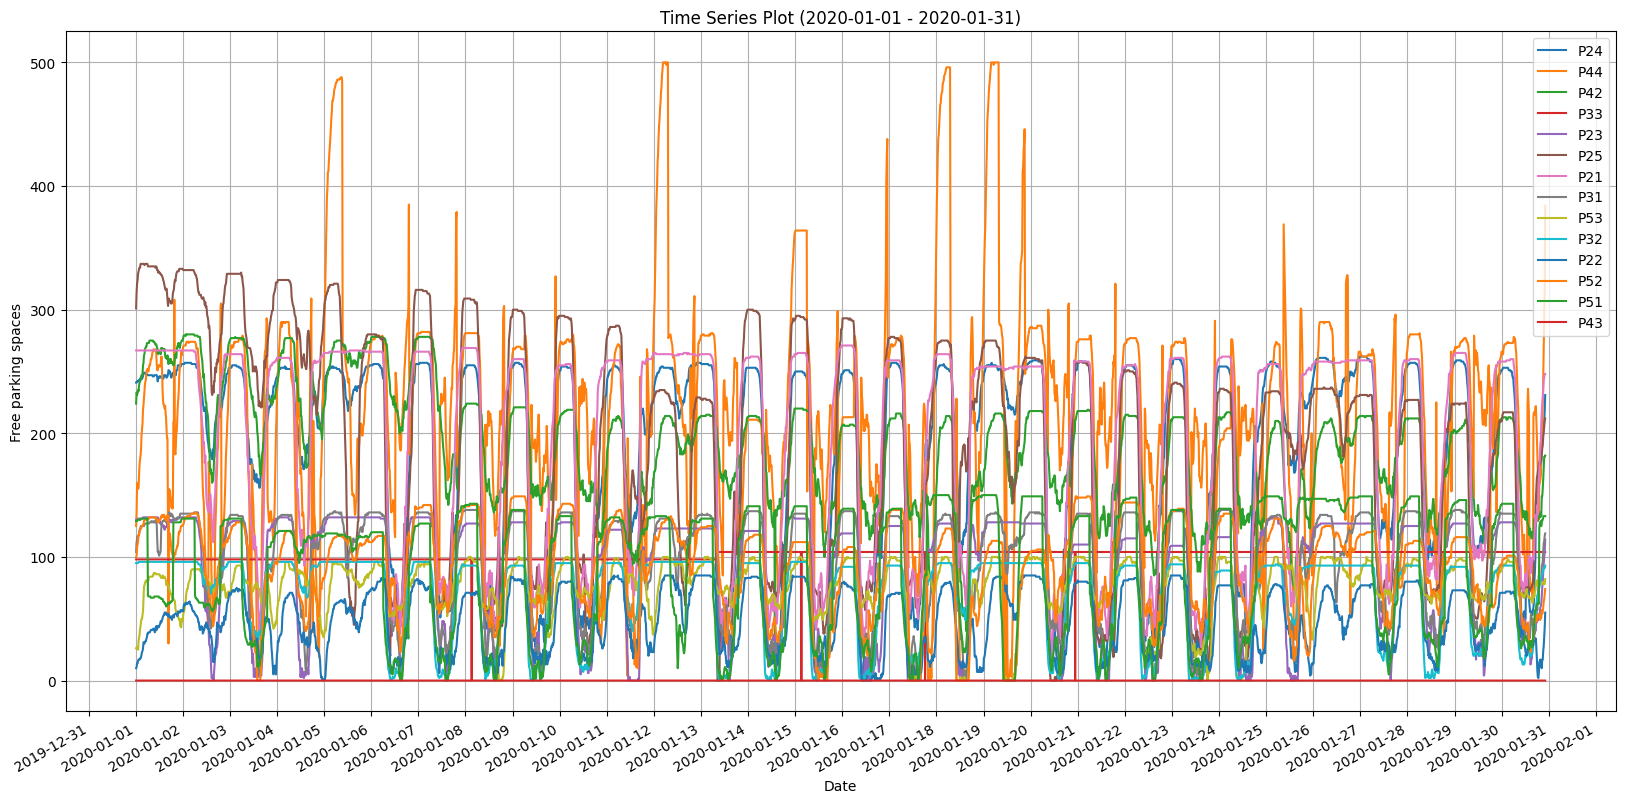

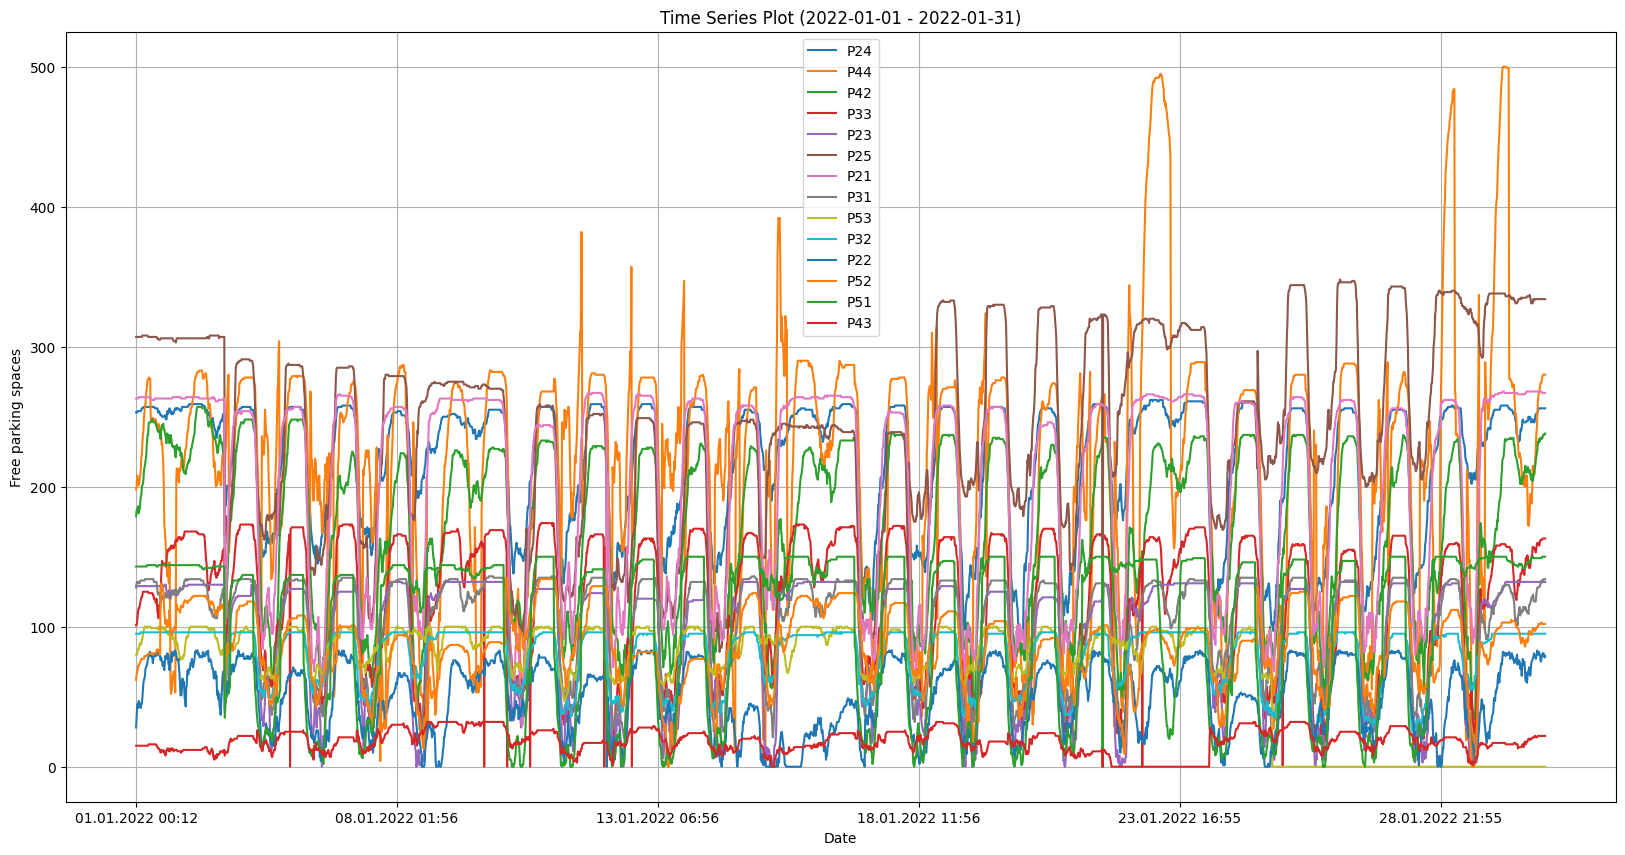

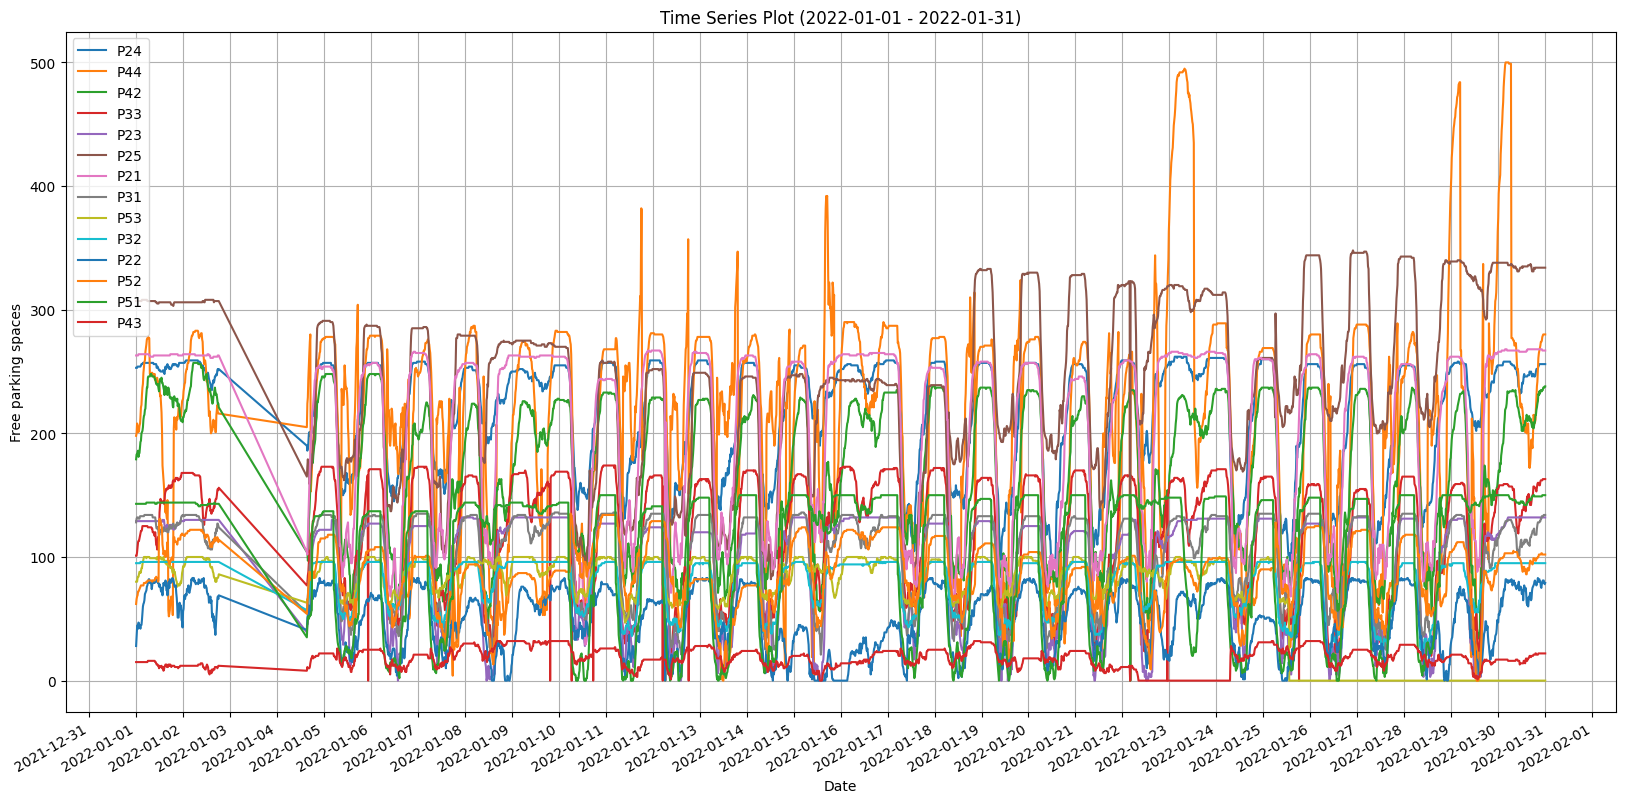

In [74]:
# TODO decide what to plot
plot_time_series('2020-01-01', '2020-01-31')
plot_time_series('2020-01-01', '2020-01-31', with_consistent_dates=True)
plot_time_series('2022-01-01', '2022-01-31')
plot_time_series('2022-01-01', '2022-01-31', with_consistent_dates=True)

In [ ]:
# df['datetime_intg'] = df['datetime_formatted'].dt.strftime("%Y%m%d%H%M%S").astype('int64')